<h1 align="center"> Logistic Regression</h1>

## Program so far
***
 - We learnt about different types of Machine Learning Problems

 - We learnt how to fit a linear model to our data to predict House Prices in New York
 
 - We learnt how to use "Advanced Linear Regression" techniques where we prevented overfitting by using
 
      - **Lasso Regression: which performs the L1 Regularization technique**
      
      - **Ridge Regression: which performs the L2 Regularization technique**
      

## What are we going to learn today?

- Can a Linear Regression model be used to solve a classification problem?
- What is a Decision Boundary?
- Sigmoid Function
    - Intuition
    - Simple Modifications
    - Interpretation
- Decision Boundary Intuition with Examples
- Diving Deeper
- Non-Linear Decision Boundaries
- Hyperparameter Tuning
- Overview of Methods of Hyperparameter Tuning
    - Grid Search
    - Defining parameters in sklearn
    - Using Grid Search in sklearn
    - Random Search
    - Using Random Search in sklearn
- Logistic Regression
    - Cost Function
    - Gradient Descent
    - Evaluation Metrics for Logistic Regression
        - Confusion Matrix
        - Precision and Recall
        - F-1 score
        - Area under ROC curve
        - Logarithmic Loss
- Industry Applications of Logistic Regression

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## What type of Problem is this? 
***
 - Let's try and gain some intuition
 - The graph on the next slide depicts if a patient's Tumor is Malignant (Cancerous) or not **{1: Yes; 0: No}** 
 based on the Tumor Size present in his/her body
 
 - Tumor Size is taken on the *x-axis* whereas the outcome, i.e., whether the patient's Tumor is Malginant or not is taken on the *Y-axis*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0 , n_clusters_per_class=1, flip_y=0, random_state=7)

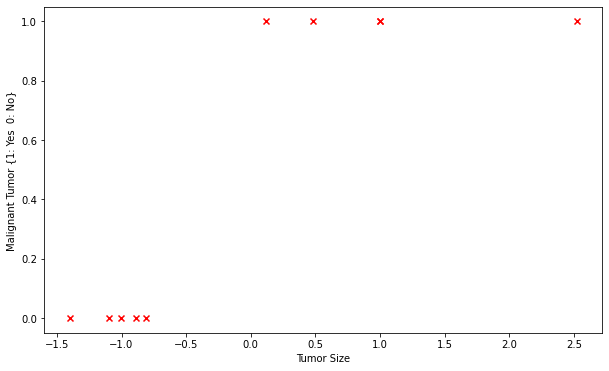

In [2]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
plt.ylabel("Malignant Tumor {1: Yes  0: No}")
plt.xlabel("Tumor Size")
plt.show()

<img src="../images/Concept-Alert.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## What type of Problem is this? 
***
 - The output, "y" has two **categories** i.e. 1 (Yes) or 0 (No) 
 
 - Thus, as we have learnt before, this is a **Classification Problem** where we are using our dependent variables, in this case Tumor Size, and are getting a **binary** output, 1 (Yes) or 0 (No)! 
 
 - Let's approach this problem with what we've learnt so far

## The Problem Explained
***
 - We have a dataset which has details about the loan approval.
 - Through the dataset, we basically want to find out that using different characteristics, do loans get approved {1: Yes} or not {0: No}
 - This is, in essence, nothing but a classification problem. 
 
 - We wanted to check, before applying, whether our request would be approved after we fit the **right model** on the data! 
 - But before we do that, let's build our intution on the '*model building*' part using the Tumor data! You will see how comprehensive this approach is

## Using Linear Regression to solve a classification problem
***

* Lets try and apply the same Linear Regression model we learned to solve the problem of classification on a dataset.

In [3]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [4]:
z = np.linspace(-2, 2, 1000)
z_predict = lm.intercept_ + (lm.coef_ * z)

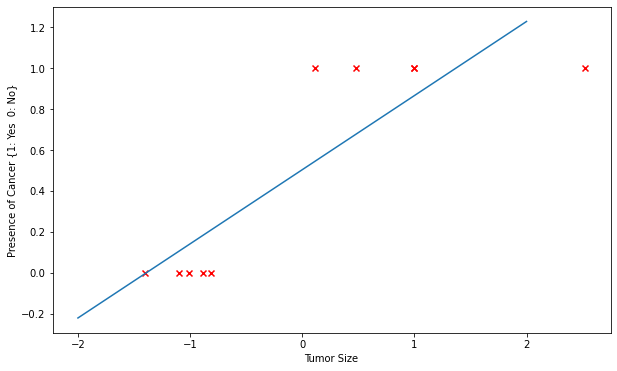

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.ylabel("Presence of Cancer {1: Yes  0: No}")
plt.xlabel("Tumor Size")
plt.show()

## So what now? Intuition behind the Decision Boundary
***
* We have fitted a linear regression model which is represented by the blue line
* How do we convert a continuous output into a discrete one?
* One way we can do is using a threshold value for the linear regression output


* Our output is either 1 or 0, and since we can even get predicted values between 0 and 1 like 0.2, 0.6, etc. (The regression line), we need to come up with a method where our output (0.2, 0.6, etc) is **transformed** to either **0** or **1**


* A reasonable threshold to keep for a 0-1 problem is 0.5. So, if our predicted value (y) is **greater than 0.5** then we assign a **"1"** to it 
* If y is **less than 0.5** then we assign a **"0"** to it


## Decision Boundary
***

* Tracing the line of y = 0.5 all the way to it's corresponding x - value (See graph below) we can get to know this "Threshold" value

* This "Threshold Value" is x = __

* This means that if x > _ then y > 0.5 (i.e. y = 1) 

* If x < _ then y < 0.5 (i.e. y = 0)

* Therefore, this vertical line (x = _ ) which separates the 2 classes (y = 1 & 0) ---> **Decision Boundary**

Text(0, 0.5, 'Target')

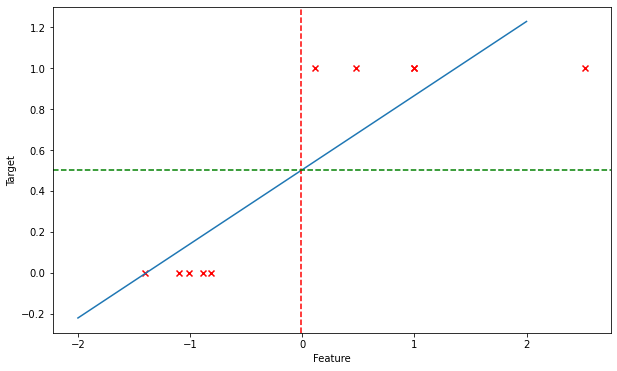

In [6]:
x_critical = (0.5 - lm.intercept_)/ lm.coef_

plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.axvline(x=x_critical, color='r', linestyle='--')
plt.axhline(y=0.5, color='g', linestyle='--')
plt.xlabel('Feature')
plt.ylabel('Target')

## Linear Regression - Not a Good Idea
***
* The problem with this approach is that Linear Regression isn't robust to outliers and it changes the fit drastically in the presence of an outlier


* We'll add an outlier and keep the same threshold as before to see the difference.

In [7]:
new_obs = 20
X = np.vstack([X, new_obs])
y = np.append(y, 1)
lm = LinearRegression()
lm.fit(X, y)
z = np.linspace(-2, new_obs, 1000)
z_predict = lm.intercept_ + (lm.coef_ * z)
x_critical2 = (0.5 - lm.intercept_)/ lm.coef_

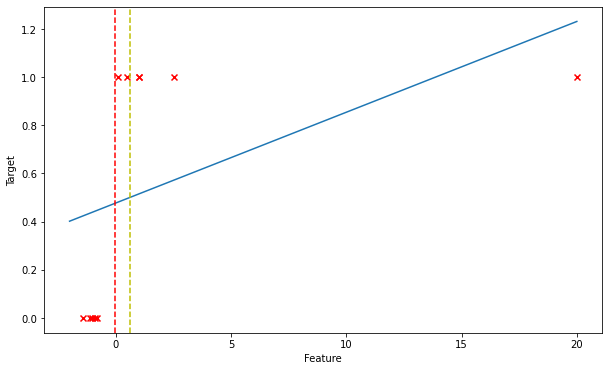

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
plt.plot(z, z_predict)
plt.axvline(x=x_critical, color='r', linestyle='--')
plt.axvline(x=x_critical2, color='y', linestyle='--')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

## Linear Regression - Not a Good Idea 
***
* We see that our Decision Boundary has shifted to the right. As a result we get some incorrect predicted "y-values" (the one's left of the boundary) 

* Since the data is labeled we know that they're originally = "1". But being on the left of the decision boundary indicates that they should be assigned a "0"

* Thus Linear Regression is not suitable for classification tasks as it is highly sensitive to outliers

* We clearly need a better model to solve the problem of classification

## Enter Logistic Regression
***
* To overcome the limitations of Linear Regression we'll use another model suitable for classification i.e., Logistic Regression.


* What do we need? 
  - We need 0 <= y <= 1
  
* For this purpose we need to use a different function (and not the Linear Regression "y = mx + b")

* This function is the **Sigmoid Function**


## What is the Sigmoid function?
***
* We need to get the values in the range of (0,1) 

* Let's have a look at the graph of the Sigmoid Function and then get into building the intuition
***
<center><img src="../images/sigmoid.png" alt="Oh Chris" style="width: 275px;"/></center>

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Intuition
***
 - The function above is $g(z) = \frac {1} {(1 + e^(-z))}$   for values of t ranging from - infinity , + infinity
 
 - $g(z)$ is also called as "Sigmoid of 'z' or just sig(z)"
 
 - Again, let's start by plugging in the extremes of it's range
 
 $g(-infinity) = \frac {1} {(1 + infinity)} = ~0$
 
 
   $g( infinity) = \frac {1} {(1 + ~0)} = ~1$
 
 - No matter what value "z" takes, we will always get an answer in the range of **[0,1]**

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Simple Modifications
***

 - Now, instead of sig(z) let's consider sig(y) **where y ---> our response**
 
 - But as discussed before; $y = \theta_0 + \theta_1(x1) + \theta_2(x_2) + .. + \theta_n(x_n)$
 
 - Thus, $g(y) = g(h_{\theta}(x)) = 1/(1 + e^{-(\theta* X)})$

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Interpretation - Let's put it simply
***
In essence: 

 - $h_θ(x)$ is the ** Estimated Probability that y = 1 on input "X"** 
 
 - Example: $h_θ(x)$ = 0.7 in our Tumor problem **MEANS** there is a 70% chance of Tumor being **Malignant**
 
 - Thus, mathematically, $h_θ(x)$ = P(y=1 | x; θ) means that **Probability that y = 1 given X and parameterized by θ**
 
 - Thus **P(y=1 | x;θ) + P(y=0 | x;θ) = 1**



<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Decision Boundary Intuition with Examples
***

We can see that g(z) >= 0.5 when z >= 0

Thus $h_θ(x)$ = g(θ*X)) >= 0.5 whenever θ x $X$ >= 0

<center><img src="../images/sigmoid.png" alt="Oh Chris" style="width: 275px;"/></center>

 - Consider: $h_θ(x) = g(θ_0 + θ_1x_1 + θ_2x_2)$

 - The graph below shows y - values (0 when "O" & 1 when "X") given values of $x_1$& $x_2$
***
<center><img src="../images/Image[4].png" alt="Math" style="width: 275px;"/></center>

So, for example  $θ_0 = -3, θ_1 = 1, θ_2 = 1$
     
So our parameter vector is a column vector with the above values
   - So, $θ^T$  = [-3,1,1]
   
Thus the z here becomes θ x $X$


<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Diving Deeper
***
We predict "y = 1" if
  - -3$x_0$ + 1$x_1$ + 1$x_2$ >= 0
  - -3 + $x_1$+ $x_2$ >= 0  (since $x_0$ is 1)
  
We can also re-write this as
 - If ($x_1$ + $x_2$ >= 3) then we predict y = 1
 - If we plot $x_1$ + $x_2$ = 3 we graphically plot our decision boundary (See next slide)

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Diving Deeper
***
<center><img src="../images/Image[5].png" alt="Math" style="width: 275px;"/></center>

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Diving Deeper
***
We have two regions on the graph
 - Blue = false
 - Magenta = true

**Line = Decision Boundary**

 - The straight line is the set of points where $h_θ(x)$ = 0.5 exactly
 - The decision boundary is a property of the hypothesis
 - Means we can create the boundary with the hypothesis and parameters without any data

Later, we use the data to determine the parameter values

i.e. y = 1 if

5 - $x_1$ > 0

5 > $x_1$

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Non - Linear Decision Boundaries
***
We can also use Logistic Regression to fit a complex non-linear data set

 - Like polynomial regression: add higher order terms

So say we have
 - $h_θ(x) = g(θ_0 + θ_1x_1+ θ_2x_2 + θ_3x_1^2 + θ_4x_2^2)$
 
 - We take the transpose of the θ vector times the input vector 

Say θ was [-1,0,0,1,1] then we say;
 - Predict that "y = 1" if
 - $-1 + x_1^2 + x_2^2 >= 0$ or
 - $x_1^2 + x_2^2 >= 1$
 
If we plot  
$$x_1^2 + x_2^2 = 1$$
 
 - This gives us a circle with a radius of 1 around 0 (see next slide)

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />
## Non - Linear Decision Boundaries
***
<center><img src="../images/Image[6].png" alt="Math" style="width: 275px;"/></center>

## Non - Linear Decision Boundaries
***
 -  We can build more complex decision boundaries by fitting complex parameters to this (relatively) simple hypothesis
 - More complex decision boundaries?
      - By using higher order polynomial terms, we can get even more complex decision boundaries
***      
 <center><img src="../images/Image[7].png" alt="Math" style="width: 200px;"/></center>

In [9]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

X, y = make_classification(n_samples=10, n_features=1, n_informative=1, n_redundant=0 , n_clusters_per_class=1, flip_y=0, random_state=7)
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'Target')

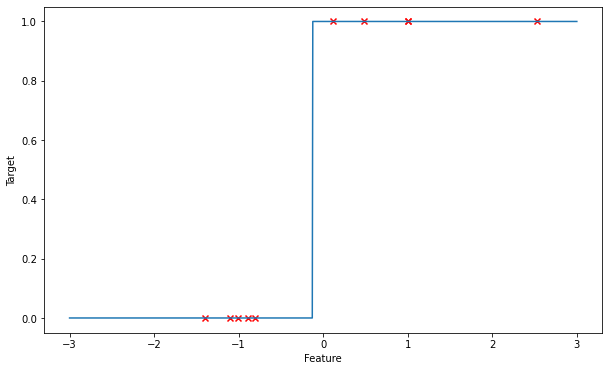

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
xt = np.linspace(-3, 3, 1000).reshape(1000,1)
yt = clf.predict(xt)
plt.plot(xt, yt)
plt.xlabel('Feature')
plt.ylabel('Target')

* In the case with no outliers Logistic Regression does a good job in seperating the classes
* We'll add an outlier and check if it still manages to do the same

In [11]:
new_obs = 20
X = np.vstack([X, new_obs])
y = np.append(y, 1)
clf.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'Target')

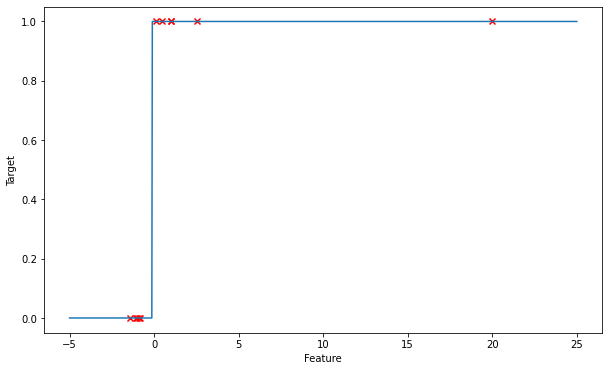

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, c='r', marker='x')
xt = np.linspace(-5, 25, 1000).reshape(1000,1)
yt = clf.predict(xt)
plt.plot(xt, yt)
plt.xlabel('Feature')
plt.ylabel('Target')

* Even after adding outliers LR seperates the classes well.
* Thus its much more suitable for classification.


## Approach
***
- After learning this, lets see how the Loan Prediction data set could use the same techniques
- We want further insight to what this data set looks like and how we would go about implementing this 
- It would be smart if we split this data set into a *Training Set* and *Test Set* 

    - I'll leave it to you to figure out why this would be appropriate

In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [14]:
dataframe = pd.read_csv('../data/loan_prediction.csv')
X = dataframe.iloc[:,:-1]
y = dataframe.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
logistic_regressor = LogisticRegression()
pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),
                           ('logistic_regression', logistic_regressor)])

In [15]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print (accuracy_score(y_test, y_pred))

0.6648648648648648


C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Hyperparameter Tuning
***
* We saw while discussing regularization that by changing the value of 𝛂, we can control the bias-variance trade-off.<br>

* Similarly there are many such parameters, by controlling and changing whom we can fine tune performance of a model.

* Such parameters are called hyperparameters and the act of controlling and changing them to fine tune the performance of a model is called hyperparameter tuning.

*  *Hyperparameters are parameters whose values are set prior to the commencement of the learning process.*

## Hyperparameter Tuning
***
* By contrast, the value of other parameters is derived via training.


* Hyperparameter optimization or model selection is the problem of choosing a set of optimal hyperparameters for a learning algorithm, usually with the goal of optimizing a measure of the algorithm's performance on an independent data set.

## Hyperparameter Tuning
***
So, to summarize Hyperparameters: 

* Define higher level concepts about the model such as complexity, or capacity to learn.
* Cannot be learned directly from the data in the standard model training process and need to be predefined.
* Can be decided by setting different values, training different models, and choosing the values that test better.


## Hyperparameter Tuning
***
Some examples of hyperparameters: 


* Number of leaves or depth of a tree.
* Number of latent factors in a matrix factorization.
* Learning rate (in many models).
* Number of hidden layers in a deep neural network.
* Number of clusters in a k-means clustering.

## Overview of Methods of Hyperparamter Tuning
***
* Grid Search
* Random Search

## Grid Search
***
* Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

The grid is generally provided as a parameter.



## Grid Search
***
* Let's see how we can perform the gridsearch using sklearn.
* Here, first we decide which parameters we check using grid search, and also decide the values at which we want to carry out the search.

## Defining the parameters in `sklearn`
***
* We can specify the parameters for a particular element in the pipeline by concatenating the parameter name with element name using a double underscore ("__")
* For a single element, just specify parameter and values
* See an example below

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report

## For a single object
ridge = Ridge()
params = {"alpha": [1, 2, 5, 10],
          "fit_intercept": [True, False]}

In [17]:
## For a pipeline object
pipeline = Pipeline(steps=[('add_poly_features', PolynomialFeatures()),
                           ('logistic_regression', logistic_regressor)])

## Defining the parametrs grid
params = {'add_poly_features__degree':[2,3,4,5],
          'logistic_regression__penalty':['l1','l2']}

## Using `gridsearch` in `sklearn`
***
* After defining the object and the parameters grid, pass them in the  `GridSearchCV` and let sklearn take over!

In [18]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=params)
grid_search.fit(X_train,y_train)
y_prediction = grid_search.predict(X_test)

cross_val_score(grid_search.best_estimator_,X_train,y_train)

C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning

C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ext

array([0.6744186 , 0.68604651, 0.6744186 , 0.68604651, 0.69411765])

## Random Search
***
* Random search is an approach to parameter tuning that will sample algorithm parameters from a random distribution (i.e. uniform) for a fixed number of iterations.
* A model is constructed and evaluated for each combination of parameters chosen.


## Using Random Search in `sklearn` 
***

In [19]:
from sklearn.model_selection import RandomizedSearchCV
params = {'add_poly_features__degree': range(0,4),
          'logistic_regression__penalty':['l1','l2']}

rand_search = RandomizedSearchCV(estimator = pipeline,param_distributions = params, n_iter=5)
rand_search.fit(X_train,y_train)
y_prediction = rand_search.predict(X_test)

cross_val_score(rand_search.best_estimator_,X_train,y_train)

C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning

C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\mlvik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0.75581395, 0.72093023, 0.81395349, 0.74418605, 0.87058824])

## Changing Tracks for a bit
***
- Now that we're getting a better idea of Logistic Regression, we need to understand what is happening behind the scenes! 

- How are we getting correct predictions with the help of the sigmoid function? 

- As you might have guessed, like Linear Regression, this has a lot to do with our Paramters (thetas) AND how we get those optimal parameters (computationally)

- Getting those optimal parameters is directly related to the Cost Function!! Let's get straight to it! 

## Logistic Regression - Cost Function and Gradient Descent
***
- Till now we studied the intuition behind the Sigmoid Function

- We also studied how Logistic Regression works to get outputs in the range of [0,1]

- We discussed the interpretation of the output too! 

<div class="alert alert-block alert-info"> Now, like Linear Regression let's delve deeper into the intuition behind the Cost Function and how we apply Gradient Descent to make things work in Logistic Regression. It's actually quite clever!
</div>

## Cost Function 
***
 - Fit θ parameters
 - Define the optimization object for the cost function we use to fit the parameters
     - Training set consists of **"m"** training examples
         - Each example has a **n+1** length column vector
***      
 
<center>**Training set:** $\{(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),\cdots,(x^{(m)},y^{(m)})\}$<br/><br/></center>
<center>** m examples ** $x \epsilon \begin{bmatrix}x_{0}\\x_{1}\\\cdots\\x_{n}\end{bmatrix}$</center><center>$x_{0}=1,y\epsilon \{0,1\}$</center> 

 $$ h_{\theta}(x) = \frac{1}{1+e^{-\theta^TX}} $$


## Cost Function
***
* This is the situation: 
  - Set of m training examples
  - Each example is a feature vector which is n+1 dimensional
  - $x_0$ = 1
  - y ∈ {0,1}
  - Hypothesis is based on parameters (θ)
      - **Given the training set how to we chose/fit θ?**


## Cost Function
***
 - For Linear Regression we use the following Cost Function to determine optimal θ's
 ***      
 <center>$$ J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}x^{(i)}-y^{(i)})^2 $$
</center> 

## Cost Function
***
- Instead of writing the squared error term, we can write; if we define "cost()", 
Which evaluates to the cost for an individual example using the same measure as used in linear regression

 - We can redefine J(θ) as

***      
 <center>$$ J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}Cost(h_{\theta}(x^{(i)}),y^{(i)}) $$</center> 

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Cost Function
***
 - What does this actually mean?
   - This is the cost you want the learning algorithm to pay if the **outcome is $h_θ(x)$** and the *actual outcome is y*
   
 - What else do we need to consider?
   - We would like a **convex function** so if you run gradient descent you converge to a **global minimum**
   
 - Why? 
   - If we just use the Sigmoid function as is in the cost function on the previous slide, it's a **NON-CONVEX** function 
 
 - What do you mean by Non-Convex? 
   - Our hypothesis function has a non-linearity (sigmoid function of $h_θ(x)$ )
   - This is a non-linear function
   

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Cost Function - Local Optima vs Global Optima
***
Since it's non-convex:

 - If you take $h_θ(x)$ and plug it into the Cost() function, and then plug the Cost() function into J(θ) and plot J(θ) we find many **local optimum** -> non convex function
 
 - Why is this a problem?
     - Lots of **local minima** mean gradient descent may not find the **global optimum** - may get stuck in a global minimum
     - We would like a convex function so if you run gradient descent you converge to a global minimum
***      
 <center><img src="../images/local-optima.png" alt="Math" style="width: 500px;"/></center> 

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />

## A Convex Cost Function 
***
 - To get around this we need a different, convex Cost() function which means we can apply gradient descent
 - This is our Logistic Regression Cost Function: 
 ***
 $$ J(\theta) = \frac{1}{m}\sum_{i=1}^mCost(h_{\theta}(x^{(i)}),y^{(i)}) $$
 $$ =- \frac{1}{m}[\sum_{i=1}^my^{(i)}logh_\theta(x^{(i)})+(1-y^{(i)})log(1-h_\theta(x^{(i)}))] $$

 - Let's consider y = 1 and plot the function
  ***  
 <center><img src="../images/Image[13].png" alt="Math" style="width: 250px;"/></center>

## Intuition - Convex Cost Function
***
 - X axis is what we predict
 
 - **Y axis is the cost associated with that prediction**
 
So when we're right, i.e when the predicted and actual y = 1 
 - cost function is 0
 
Else it slowly increases cost function as we become "more" wrong

This cost functions has some interesting properties:

 - If y = 1 and $h_θ(x)$ = 1
If hypothesis predicts exactly 1 and that's exactly correct then that corresponds to 0 (exactly, not nearly 0)

As $h_θ(x)$ goes to 0
 - Cost goes to infinity

This captures the intuition that if $h_θ(x)$ = 0 (predict P (y=1|x; θ) = 0) but y = 1 this will penalize the learning algorithm with a **massive cost**

## Intuition - Convex Cost Function
***
Let's plot the cost function when y = 0
***
 <center><img src="../images/Image[14].png" alt="Math" style="width: 250px;"/></center>

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Intuition - Convex Cost Function
***
 - When y = 0, we know that the cost is  -log(1- $h_θ$( x ))
 
 
 - In essence, it's the inverese of the cost when y = 1. We can see that graphically [previous slide]
 
 
 - Now it goes to **plus infinity as $h_θ(x)$ goes to 1**
 

 - With our particular cost functions J(θ) is going to be **convex** and avoid local minimum

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Enter : Simplified Cost Function 
***
An easier way to write the cost function is when we combine the 2: 

 - cost($h_θ$(x),y) = -ylog( $h_θ$(x) ) - (1-y)log( 1- $h_θ$(x) ) 
 


## Simplified Cost Function 
***
When y = 1
 - Then our equation simplifies to:
    - -log($h_θ$(x)) - (0)log(1 - $h_θ$(x))
    - = -log($h_θ$(x))

 - **Which is what we had before when y = 1**
 

## Simplified Cost Function 
***
When y = 0

 - Then our equation simplifies to:
     - -(0)log($h_θ$(x)) - (1)log(1 - $h_θ$(x))
     - = -log(1- $h_θ$(x))
 - **Which is what we had before when y = 0**
 
Clever!

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Simplified Cost Function
***
To sum it up, our cost function for "m" training examples is: 
***
  $$ J(\theta) =- \frac{1}{m}[\sum_{i=1}^my^{(i)}logh_\theta(x^{(i)})+(1-y^{(i)})log(1-h_\theta(x^{(i)}))] $$

## Utilizing Gradient Descent
***
 - Now to get minimum θ : Repeat: 
***
 <center>$\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_{j}}J(\theta) \cdots(1)$</center>
***
 - We need to Minimize J(θ)

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Utilizing Gradient Descent
***
 - After doing some mathematical derivations and re-arranging, we get an Algorithm that's similar to the one we encountered in Linear Regression:
***
 <center>$\theta_j := \theta_j + \alpha(y^{(i)}-h_{\theta}(x^{(i)}))x_{j}^{(i)}$</center>
***
and this is how we simultaneously update "θ" for all "j".  Also:
***
 <center>$h_{\theta}(x) = \frac{1}{1+e^{-\theta^TX}}$</center>

<img src="../images/Maths-Insight.png" alt="Maths-Insight" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Simply Put
***
 <center>Repeat for all $\theta_j$ simultaneously { <br> $\theta_j := \theta_j - \alpha\sum_{i=1}^m(h_{\theta}(x^{(i)})- y^{(i)})x_{j}^{(i)}$</center>
 <center>}

## Ways to Evaluate 
***
 - We can tell that if we sit to cross-check each and every prediction, it can take days to find out how well our model did
 
 - This calls for a better method to evaluate our model. Methods such as Confusion Matrix, accuracy, F1-score, etc are all very handy mechanisms and are very easy to build due to the advanced libraries available to us! 
 
 - Let's check these out! 

## Evalution Metrics for Logistic Regression
***
* As we already know, we use different metrics for regression and classification
* We know that we can use `MSE` for regression problems and `Accuracy` for classification problems
* However, these might not be the best metrics in every situation<br><br>

## Evalution Metrics for Logistic Regression
***
**Example**<br><br>
We are trying to detect credit card fraud.
Occurrence rate of fraud is 3 in 1000.
Let's say our model predicted as in the table : 


| Value | Fraud  | Not Fraud |
|---|---|---|
| Predicted Fraud | 1 | 1 |
| Predicted Not Fraud | 2 | 996 |


* Following are the types of Classification Metrics :
    * Confusion Matrix
    * Classification Matrix
    * F1 Score
    * Area under ROC curve
    * Classification Report
    * Logarithmic Loss

### Confusion Matrix
***
- The confusion matrix is a handy presentation of the accuracy of a model with two or more classes. Below is an example of a Confusion Matrix 
<br><br>


| Value | Fraud  | Not Fraud |
|---|---|---|
| Predicted Fraud | 1 | 1 |
| Predicted Not Fraud | 2 | 996 |


    True Positives (TP): These are predicted yes and actually yes (Top Left)
    True Negatives (TN): We predicted no, and actually no (Top Right) 
    False Positives (FP): We predicted yes, but actually no. (AKA "Type I error.") (Top Right) 
    False Negatives (FN): We predicted no, but yes. (AKA"Type II error.") (Bottom Left)


### Confusion Matrix
***
* Classification accuracy is the number of correct predictions **(TN + TP)** made as a ratio of all predictions made. **(TN + TP +FN + FP)**<br><br>
It is suitable when :
* There are an equal number of observations in each class
* That all predictions and prediction errors are equally important,which is often not the case.

## Confusion Matrix
***
 -We will view the  confusion matrix to see how well the model performed
 
 - Let's see how to do this in Python

In [20]:
# Applying confusion matrix on above data
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[  5,  57],
       [  5, 118]], dtype=int64)

## Precision and Recall 
***
So we have 


| Value | Actual Class 1  | Actual Class 0 |
|---|---|---|
| Predicted Class 1| True +ve  | False +ve |
| Predicted Class 0 | False -ve | True -ve  |


Consider this: Let's say *y=1* in presence of Cancer in a patient

 - Now, of all patients where we predicted y = 1, what fraction actually has cancer? Think about this given the table above! 

## Precision and Recall 
***
It turns out that what we're trying to calculate is nothing but the **Precision** of the model

Here, 


$$Precision = \frac {(True +ves)} {(True +ves  +  False +ves)}$$

Doesn't this make sense? This is the fraction that **ACTUALLY** has Cancer

## Precision and Recall 
***
 - Now, of **all patients that actually have cancer**, what fraction did we **CORRECTLY** detect as having cancer? 
 
 - This is nothing but the recall! 
 
 - Here 

$$Recall = \frac {(True +ves)} {(True +ves  +  False -ves)}$$

<center><img src="../images/image99.png" alt="precision and recall" style="width: 400px;"/></center>

## Trade - Off: Precision Vs. Recall 
***
- This is more of a in-class activity! 
- Think about this: What happens if we get an increased value of Precision? Do you think that would lower Recall? And vice-versa? 

- Think of an example! And use easy numerical calculations too. You can just use a pencil and paper, no need for code! 

- [**Hint**: There is a trade-off!] 

### F1 Score
***
 - To deal with this Trade-off we calculate something known as the F-1 Score: F1 score is a good approach to minimize a bias towards either the Precision or the Recall

 $$F-1Score = \frac {2PR} {P + R} $$

## F-1 Score 
***
F1 Score is defined as 

<center>$2*\frac{precision*recall}{precision+recall}$</center>

* tp = true positive
* tn = true negative
* fp = false positive
* fn = false negative

## F1 - score 
***
- Using this intuition, we want to calculate the F-1 Score to better understand the evaluation of our model

- Let's see how to implement this in Python! 

In [21]:
## code for f-1 score

from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.7919463087248322

## Area under ROC Curve
***
ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two.
Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.
- The AUC represents a model’s ability to discriminate between positive and negative classes.
 - An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.<br>
**Brain Teaser**: What does area < 0.5 signify?

### Area Under ROC Curve
***
ROC can be broken down into sensitivity and specificity. Let's understand these concepts.


## Sensitivity and Specificity.
Let us take an example of patients having a disease.

In simple terms, the proportion of patients that were identified correctly to have the disease (i.e. True Positive) upon the total number of patients who actually have the disease is called as Sensitivity or Recall.


Similarly, the proportion of patients that were identified correctly to not have the disease (i.e. True Negative) upon the total number of patients who do not have the disease is called as Specificity.


Trade-off between Sensitivity and Specificity
When we decrease the threshold, we get more positive values thus increasing the sensitivity. Meanwhile, this will decrease the specificity.

Similarly, when we increase the threshold, we get more negative values thus increasing the specificity and decreasing sensitivity.

## ROC 
ROC is nothing but a plot of sensitivity also known as True Positive Rate against (1-specficity) also known as False Positive Rate for different values of threshold.

In [22]:

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.5199973773931288

## Logarithmic Loss
***
Logarithmic loss (or logloss) is a performance metric for evaluating the predictions of probabilities of membership to a given class


Where,
* N is the number of samples or instances,
* M is the number of possible labels,
* y<sub>ij</sub> is a binary indicator of whether or not label j is the correct classification for instance i,
* p<sub>ij</sub> is the model probability of assigning label j to instance i.

 $$ Logloss=- \frac{1}{n}\sum_{i=1}^n[y_ilogp_{i}+(1-y_{i})log(1-p_{i})] $$


## Logarithmic Loss
***
* The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm.<br>
* Predictions that are correct or incorrect are rewarded or punished proportionally to the confidence of the prediction.<br>
* logloss nearer to 0 is better, with 0 representing a perfect logloss. 

## Log Loss
***
 - Let's check the python implementation of logloss 

In [23]:
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

11.575403856962074

<img src="../images/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>
<br />

# In-session Recap Time
***
* Decision Boundary
* Hyperparameter Tuning
* Cost Function
* Gradient Descent
* Evaluating Matrix
* Precision and Recall
* Logarithmic Loss

## Industry Applications of Logistic Regression

1. An Application of Logistic Regression in a Six Sigma Project in Health Care
    - Health care today is facing serious problems: quality of care does not meet patients' needs and costs are exploding. In the cardiology department of the Virga Jesse Hospital in Belgium, discharged patients are advised to participate in a rehabilitation program. However, many of the discharged patients do not join the program, and others quit before being declared cured (a so-called dropout). An improvement project was started that aims to increase revenues by either attracting more patients to the rehabilitation program or reducing the fraction of dropouts.A large data set with 516 treated patients was available. We model the probability that a patient joins the program as a function of various numerical and categorical influence factors. First an exploratory data analysis is performed, using bar charts and box plots. This is followed by a more formal statistical analysis using logistic regression.The logistic regression model reveals the important influence factors. The probability of joining the program depends on whether a patient has a car at his or her disposal and the distance from a patient's home to the hospital. As a solution, various measures to stimulate carpooling were implemented. Prior to the implementation, a cost–benefit analysis was conducted using the fitted regression model.
    <br>
    <br>
2. Application of logistic regression for fault analysis in an industrial printing process.
    - The method specifically deals with binary data, for which the results of the production process fall into two categories, rejected or accepted. The method is referred to as logistic regression, and is capable of predicting future fault occurrences by the analysis of current measurements from machine parts sensors. Individual analysis of each type of fault can determine which parts of the plant have a significant influence on the occurrence of such faults; it is also possible to infer which measurable process parameters have no significant influence on the generation of these faults. Information derived from the analysis can be helpful in the operator's interpretation of the current state of the plant. Appropriate actions may then be taken to prevent potential faults from occurring. The algorithm is being implemented as part of an applied self-learning expert system.


In [24]:
#Loading the heart disease dataset for mini-challenges
#Goal is to predict whether or not a patient has heart disease
df = pd.read_csv("../data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 1 
1. Store the features in the variable X.
2. Store the target variable ('disease') in the variable y.
3. Split the data into train and test.

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 2
Fit a logistic regression model on the data and use gridSearchCV to find the optimum number of polynomial features from the list [2,3,4] and the best regularization technique from [l1,l2].
Then predict on the test dataset and store the result in the variable y_pred.

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 3
Find the confusion matrix, f1-score, log-loss of your model.

Reach out www.vikas-ai.com